<div style= "text-align: center"> 
    <h1>STUTERN DATA SCIENCE PROJECT</h1>
    <h5>by</h5>
    <h3> FAIZA YUSUF </h3>
    <h3> Analysis on Employee Attrition </h3>
</div>

In [178]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [179]:
%%sql 

sqlite:///db/attr_data.db

In [180]:
%reload_ext sql

In [181]:
%%sql 

PRAGMA table_info(attr_data);

 * sqlite:///db/attr_data.db
Done.


cid,name,type,notnull,dflt_value,pk


In [182]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

import warnings    # We want to suppress warnings
warnings.filterwarnings("ignore")    # Ignore warnings

In [183]:
cnx = sqlite3.connect('attr_data.db')

dataf = pd.read_sql_query("SELECT * from attrition_records", cnx)
df = dataf.copy()
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


## DATA CLEANING

### checking missing values

In [184]:
df.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

<p> from the above output it is clear that there is no missing value in the datasets

### check duplicates values

In [185]:
df.duplicated().sum()

0

<p> there is no duplicate values in the dataset

In [186]:
# checking for number of rows and columns
df.shape

(1470, 36)

<p> there are <b> 1470 </b> and <b> 36 </b> columns in the dataset

In [187]:
# list of columns
df.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### checking for the unique values for each column

In [188]:
for column in df:
    print('No. of values for {} is {}'.format(column, df[column].nunique()))

No. of values for id is 1470
No. of values for Age is 43
No. of values for Attrition is 2
No. of values for BusinessTravel is 3
No. of values for DailyRate is 886
No. of values for Department is 3
No. of values for DistanceFromHome is 29
No. of values for Education is 5
No. of values for EducationField is 6
No. of values for EmployeeCount is 1
No. of values for EmployeeNumber is 1470
No. of values for EnvironmentSatisfaction is 4
No. of values for Gender is 2
No. of values for HourlyRate is 71
No. of values for JobInvolvement is 4
No. of values for JobLevel is 5
No. of values for JobRole is 9
No. of values for JobSatisfaction is 4
No. of values for MaritalStatus is 3
No. of values for MonthlyIncome is 1349
No. of values for MonthlyRate is 1427
No. of values for NumCompaniesWorked is 10
No. of values for Over18 is 1
No. of values for OverTime is 2
No. of values for PercentSalaryHike is 15
No. of values for PerformanceRating is 2
No. of values for RelationshipSatisfaction is 4
No. of val

<p> since EmployeeCount , Over18 , and StandardHours  have one unique name, and also EmployeeNumber  have the different values for each row,  then ithe columns will be dropped </p>

In [189]:
# dropping the four columns
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1,  inplace=True)

In [190]:
df.shape

(1470, 32)

<p> the number of columns has been reduced

In [191]:
# checking the infor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

<p> from here we can see the dataype of each column, there are <b> 8 </b> categorical variables and the remaining columns are  numerical variables </p>

In [192]:
# summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


<p>from the above output we can see the mean, minimum and maximum of each column</p>
<li> the average age in the dataset is 36 while the minimum and maximum are 18 and 60 respectively, these shows that thee are young and as well old people in the company</li>
<li> the minimum distance from home is <b> 1</b> this shows that there are some employees that are very close to the company while some are far from the company as it is shown that the maximum is <b> 29 </b> </li>
<li> the average income for the company is <b> 8379 </b> </li>
<li> There are those who did 15 years in the company without promotion </li>
<li> there are some employees that spent 40 years in the company</li>

# Question one
### What do you think are the 3 factors behind employee attrition?


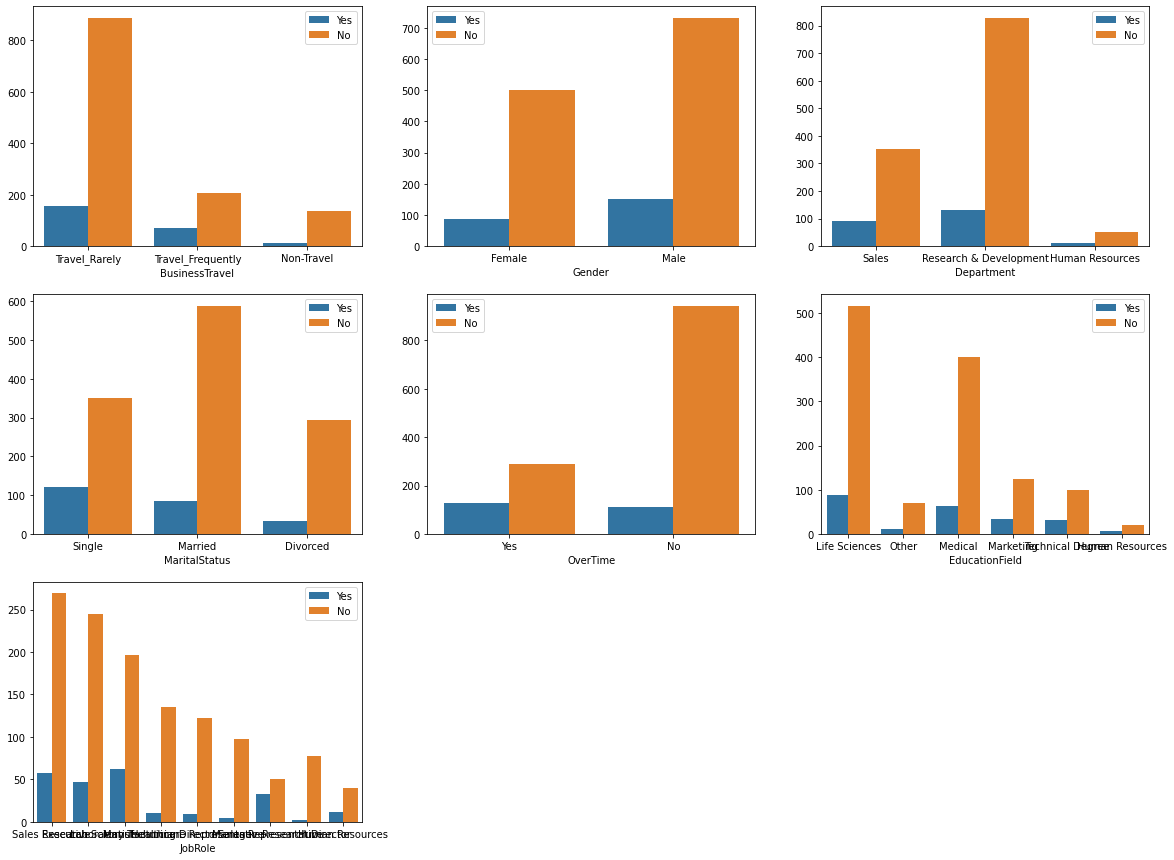

In [193]:
# let see for categorical variables
plt.figure(figsize=(20,15))
categorical_field = ['BusinessTravel','Gender','Department','MaritalStatus','OverTime','EducationField', 'JobRole']
for i, column in enumerate(categorical_field, 1):
    plt.subplot(3,3,i)
    sbn.countplot(data=df, x=column,  hue='Attrition')
    plt.xlabel(column,)
    plt.ylabel('')
    plt.legend()

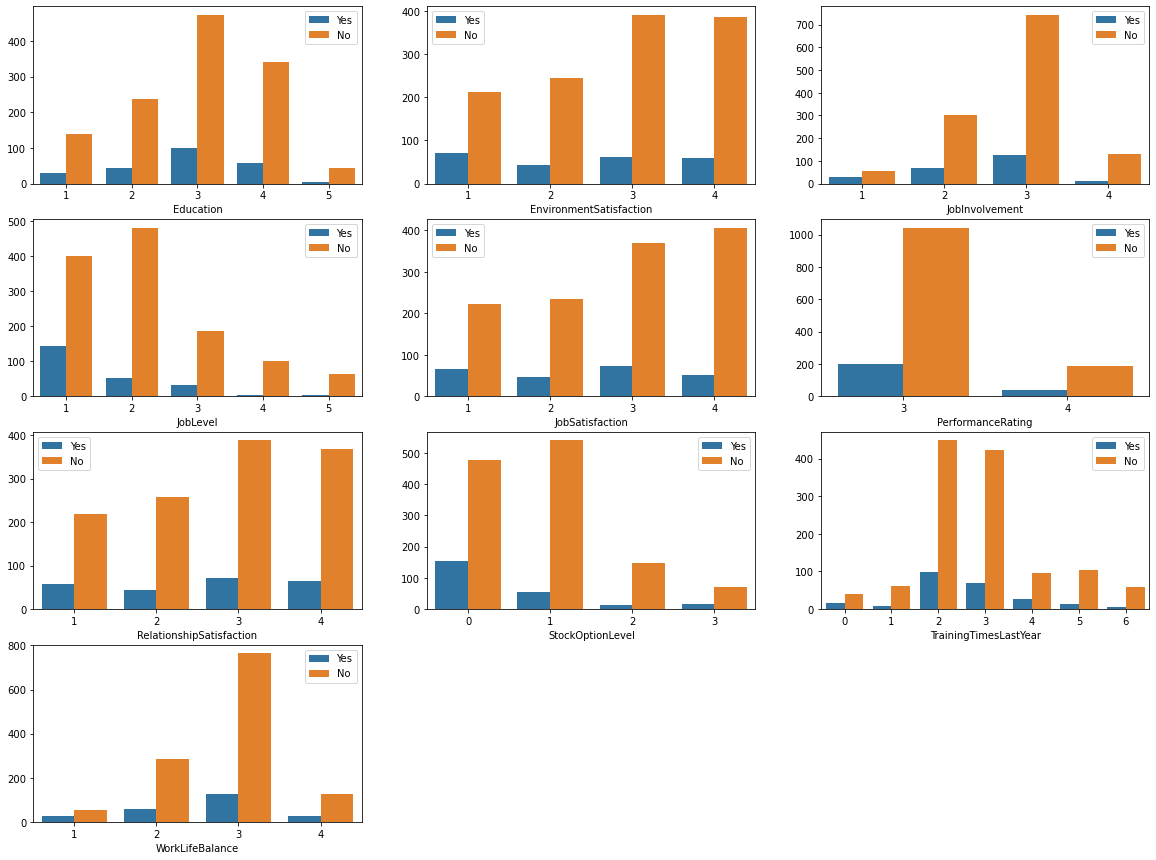

In [194]:
# let see for categorical variables
plt.figure(figsize=(20,15))
categorical_field = ['Education','EnvironmentSatisfaction', 
                     'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
for i, column in enumerate(categorical_field, 1):
    plt.subplot(4,3,i)
    sbn.countplot(data=df, x=column,  hue='Attrition')
    plt.xlabel(column,)
    plt.ylabel('')
    plt.legend()

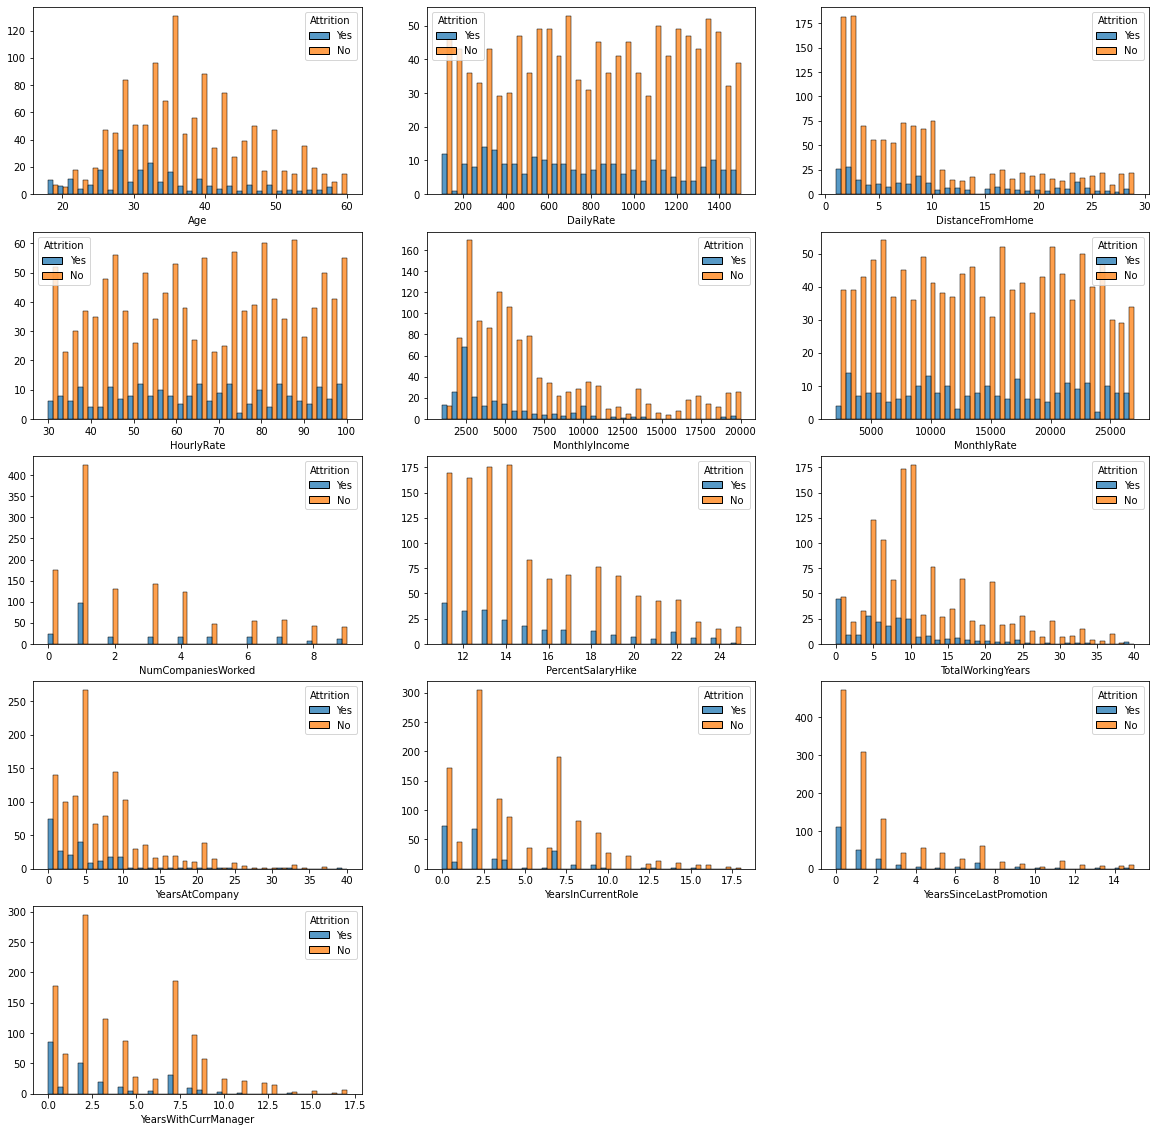

In [195]:
# for continues variable
plt.figure(figsize=(20,20))
categorical_field = ['Age', 'DailyRate','DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                     'YearsSinceLastPromotion','YearsWithCurrManager']
for i, column in enumerate(categorical_field, 1):
    plt.subplot(5,3,i)
    
    sbn.histplot(data=df, x=column, bins=30, hue='Attrition', fill=True, element='bars', multiple="dodge")
    plt.xlabel(column,)
    plt.ylabel('')

<p> from the above diagrams, the three main factors of behind employee attrition are:</p>
<li> Income: the main factor is income, people with lesser income left the company most </li>
<li> Job level: people with low job level quit thier job most</li>
<li> Age: younger employees left the company most, </li>

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## Question two
### What is the relationship between Education and Monthly Income?

In [197]:
# let check the relationship using correlation
df['Education'].corr(df['MonthlyIncome']).round(2)

0.09

<p> since the value is 0.09, this tells us that there is strong relationship between Education and monthly income </p>

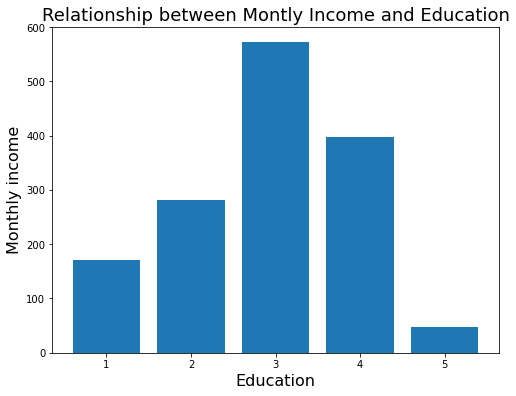

In [198]:
# let see the relationship using bar chart
v = df.groupby("Education").count()

plt.figure(figsize=(8, 6))

plt.bar(v.index, v.MonthlyIncome,)
plt.xlabel("Education", size=16)
plt.ylabel("Monthly income", size=16)
plt.title("Relationship between Montly Income and Education", size=18)

plt.show()

<p> The education has 5 levels, the above diagram shows that level 3 has the highest monthly income, followed by 4, and then i don't know why level 5 has the least salary income</p>   

## Question Three
### What is the effect of age on attrition? 

Text(0.5, 0, 'Age')

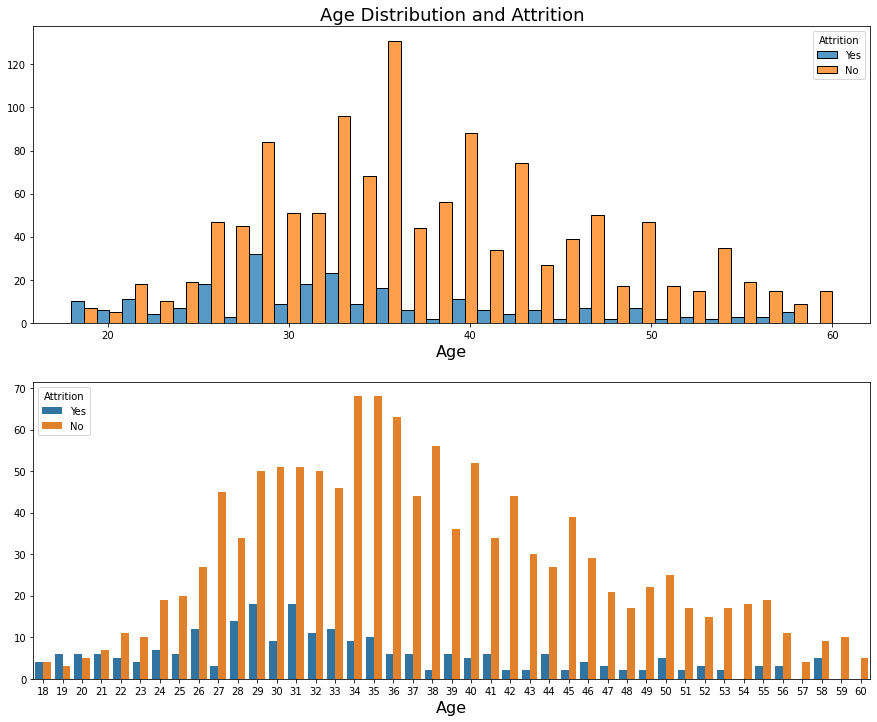

In [199]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sbn.histplot(data=df, x='Age', bins=30, hue='Attrition', fill=True, element='bars', multiple="dodge")
plt.title('Age Distribution and Attrition', size=18)
plt.ylabel('')
plt.xlabel("Age" , size=16)


plt.subplot(2,1,2)
sbn.countplot(data=df, x='Age',  hue='Attrition')
plt.ylabel('')
plt.xlabel("Age" , size=16)

<p> from the above diagram, it shows that employees around age 40 downwards has the highest number or people that left the company, especially people of age 26, 28, 29, and 30, this shows that older people in the company hardly leave the company  

## Question four
### Is Income the main factor in employee attrition?

Text(0.5, 0, 'monthly income')

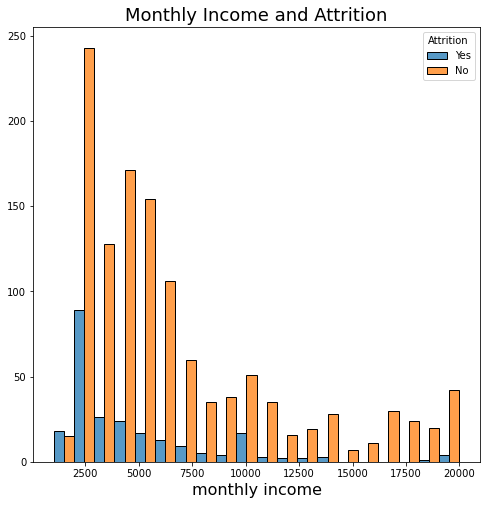

In [200]:
plt.figure(figsize=(8,8))
sbn.histplot(data=df,  x='MonthlyIncome',  hue='Attrition', fill=True, element='bars', multiple="dodge")
plt.title('Monthly Income and Attrition', size=18)
plt.ylabel('')
plt.xlabel("monthly income" , size=16)

<p> It is clearly seen that those with minimum monthly income has the highest number of people that left the company, so income is also the main factor of attrition </p>

## Question Five
### How does work-life balance impact the overall attrition rate?


Text(0.5, 0, 'Work life balance')

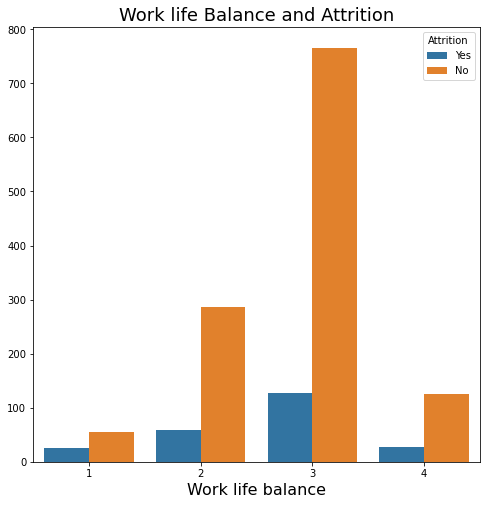

In [201]:
plt.figure(figsize=(8,8))
sbn.countplot(data=df, x='WorkLifeBalance',  hue='Attrition')
plt.title('Work life Balance and Attrition', size=18)
plt.ylabel('')
plt.xlabel("Work life balance" , size=16)

<p> the work life balance has 4 stages, the above figure shows that employees in stage three work life balance has the highest number of people that left the company, those who even have the highest work life balance that is stage 4 doesn't leave the company compare to stage three</p>
<p> those with least work life balance are also the least that left the company<p/>

## Conclusion
<p> employees with low monthly income, total working years, years in current role, years since last promotion, years with current manager, and years at company tends to quit their job more</p>
<p> employees with the age below 40 quit their job, maybe some of them need to further their education</p>
<p> also, people living close to the company quit their job</p>
<p> stage three of the level of education have the highest number of employees that quit, while life science field has the highest number of people that quit</p>
<p> employees in the third level of work life balance has the highest number of attrition</p>

## Recommendation
<p> the company should minimize hiring people close the company <p>
<p> the company should be hiring people above 30 most,  because most people around that age have finish their studies, they don't need to go back and further their education</p>
<p>

## refrerence
<a href= "https://seaborn.pydata.org/generated/seaborn.histplot.html">link</a>